In [12]:
import sys
from pandas import DataFrame, read_excel, pivot_table
from matplotlib import pyplot as plt

In [3]:
origin = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/04.데이터시각화/수업/(2)Pandas/연구과제데이터/mpg.xlsx')
origin


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
df = origin.copy()
df.value_counts()
df.ndim

2

In [5]:
df.shape

(234, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [7]:
df.dtypes

id                int64
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

문제 1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

In [16]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

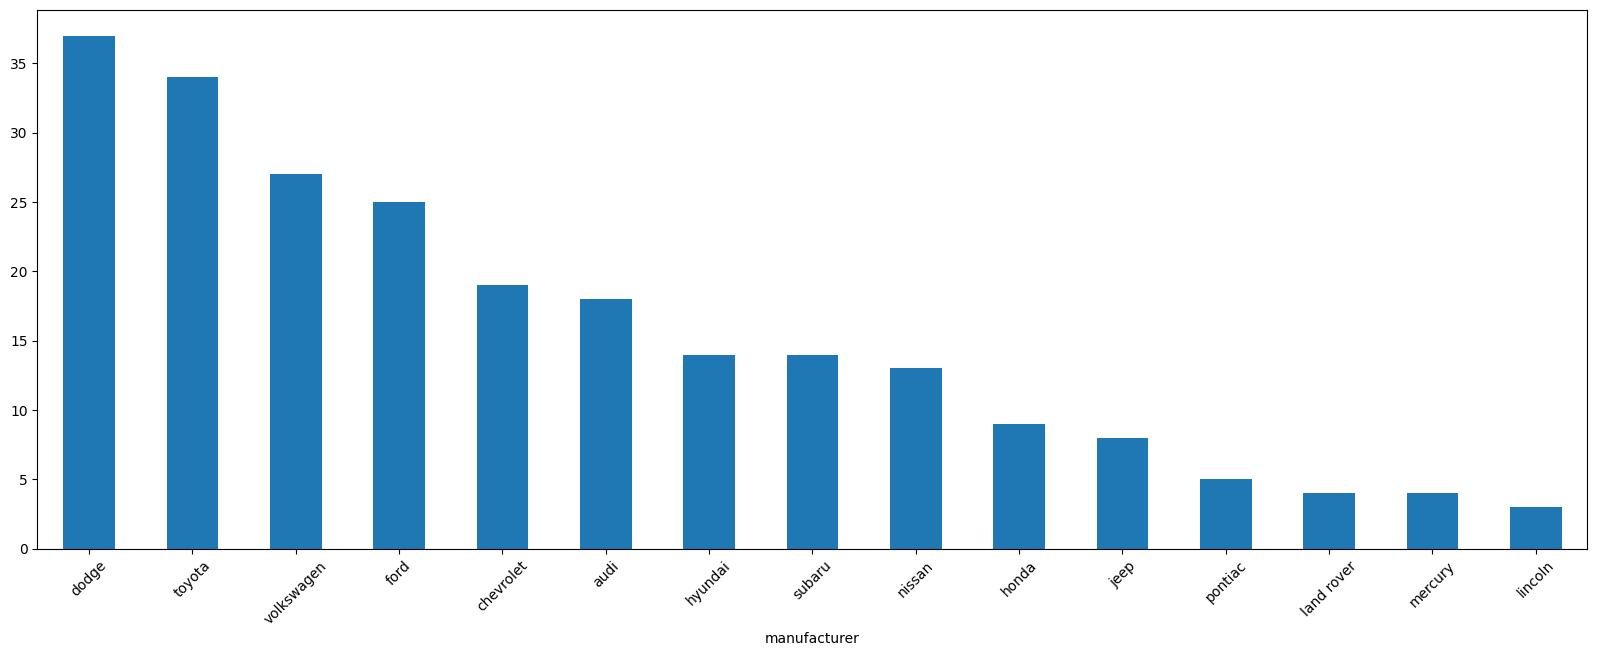

In [11]:
df2 = df['manufacturer'].value_counts()
df2.plot.bar(rot=45,figsize=(20,7))
plt.show()
plt.close()

문제 2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [24]:
df3 = df[['manufacturer','year','model']].groupby(['manufacturer','year'],as_index=False).count()
df3

,manufacturer,year,model
0,audi,1999,9
1,audi,2008,9
2,chevrolet,1999,7
3,chevrolet,2008,12
4,dodge,1999,16
5,dodge,2008,21
6,ford,1999,15
7,ford,2008,10
8,honda,1999,5
9,honda,2008,4


In [21]:
df4 = pivot_table(df3, index='manufacturer',
                  columns='year',
                  values='model')

df4

year,1999,2008
manufacturer,,
audi,9.0,9.0
chevrolet,7.0,12.0
dodge,16.0,21.0
ford,15.0,10.0
honda,5.0,4.0
hyundai,6.0,8.0
jeep,2.0,6.0
land rover,2.0,2.0
lincoln,2.0,1.0


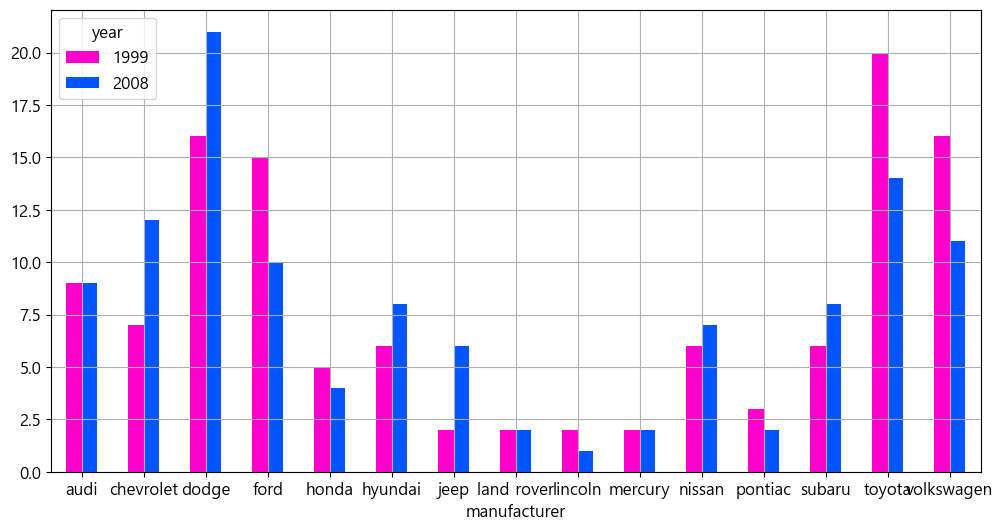

In [23]:
df4.plot.bar(rot=0, color=['#ff00cc','#0055ff'])
plt.grid()
plt.show()
plt.close()


문제 3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

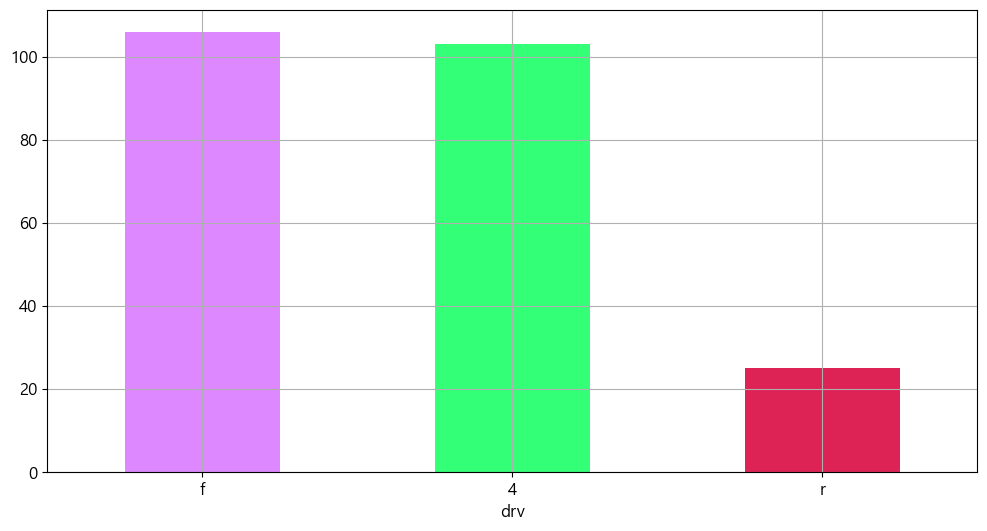

In [26]:
origin['drv'].value_counts().plot.bar(rot=0, color=['#dd88ff','#33ff77','#dd2255'])
plt.grid()
plt.show()
plt.close()

문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

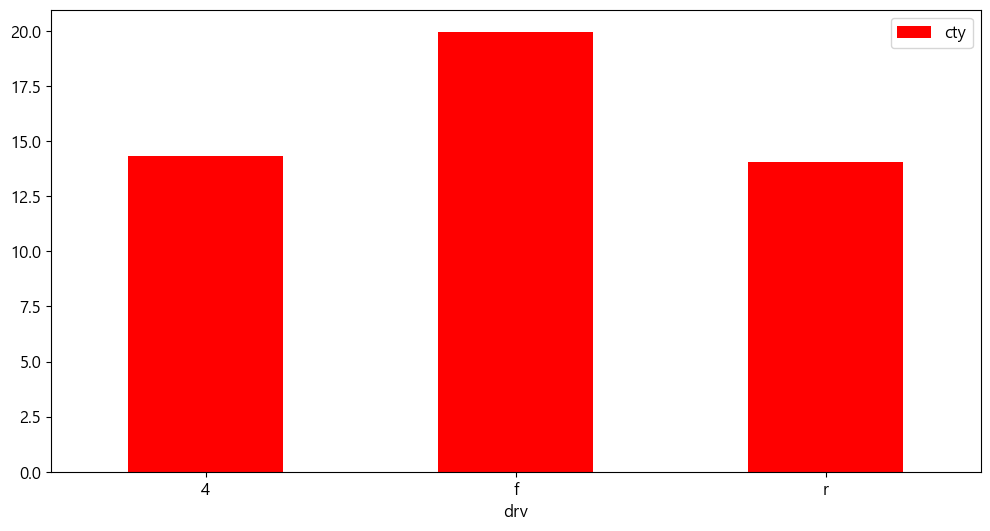

In [45]:
df5 = origin[['drv','cty']].groupby('drv').mean()
df5.plot.bar(rot=0,color=['#ff0000', '#00ff00', '#0000ff'])
plt.show()
plt.close()

문제 5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

문제 6
배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

문제 7
철수는 새로 자동차를 구입하고자 한다.

철수가 고려하는 가장 중요한 조건은 연비이다.

철수는 자동차의 평균연비를 고속도로 연비와 도심연비에 대한 평균으로 계산하기로 하고 이를 확인하기 위해 전체 자동차에 대한 평균연비를 구한 후 이 값보다 높은 연비를 갖는 자동차의 경우 Pass를, 그렇지 않을 경우 Fail로 구분하기로 했다.

Pass 등급과 Fail 등급의 비율을 시각화 하라.
Pass 등급과 Fail 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
Pass 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라
위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오.